# Lab Exercise: Exploring the ERA5 Dataset

### Task 1: Exploring the dataset contents.

Let's start by investigating the dataset structure. Your dataset `era5_philippines_2009_09_27.nc` includes multiple variables with three primary dimensions (`valid_time`, `latitude`, and `longitude`).

1. Examine the Variables: Identify the variable names, their dimensions, and other details from the dataset output.
2. Research Variable Descriptions: Use the [ERA5 data documentation](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation) to understand what each variable represents. 

In [2]:
import xarray as xr

# Load the netCDF file
file_path = 'era5_philippines_2009_09_27.nc'
data = xr.open_dataset(file_path)

# Display dataset information
data


<xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 4, latitude: 121, longitude: 241)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 32B 2009-09-27 ... 2009-09-27T18:...
  * latitude    (latitude) float64 968B 30.0 29.75 29.5 29.25 ... 0.5 0.25 0.0
  * longitude   (longitude) float64 2kB 110.0 110.2 110.5 ... 169.5 169.8 170.0
    expver      (valid_time) <U4 64B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 467kB ...
    msl         (valid_time, latitude, longitude) float32 467kB ...
    u10         (valid_time, latitude, longitude) float32 467kB ...
    v10         (valid_time, latitude, longitude) float32 467kB ...
    tp          (valid_time, latitude, longitude) float32 467kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-18T18:39 GRIB to CDM+CF via cfgrib-0.9.1...

#### Questions

1. What are the primary dimensions (temporal, spatial) of this dataset?
2. What do each of the variables represent? Hint: look for the keyword `parameter`
3. How often is the data recorded? Hint: valid_time dimension
4. What is is the extent (latitude, longitude) of this dataset?

#### Answers 
1. The primary dimensions consists of valid_time as the temporal, while longitude and latitude is for the spatial.
2. The variables here are the t2m (temperature at 2 meters), msl (mean sea-level pressure), u10 (east ward) v10 (northward) components of wind at 10 meters, and tp (total precipitation).
3. There are about for time slices present in this netcdf file, therefore, the data was recorderd about 4 times.
4. The latitude has records of data from 30 deg to 0 deg, from north to south. While the longitude consist of 110 deg to 170 deg, from west to east.

---

### Task 2: Descriptive Statistics and Plotting for `t2m` (2-meter Temperature)

The next step in our lab exercise is to calculate descriptive statistics and visualize the `t2m` (2-meter temperature) variable, which represents the air temperature close to the ground. This task will help students understand the range, central tendency, and variation in temperature across the area and time periods available in the dataset.

The structure of netCDF files is slightly different from HDF5 files, although both are commonly used for gridded scientific data. netCDF files, often used in atmospheric and climate sciences, are organized by dimensions, variables, and metadata:

1. Dimensions: These are the axes of the data (e.g., latitude, longitude, time). Each variable is defined over one or more dimensions.
2. Variables: These contain the actual data values. Each variable (like `t2m`) is associated with one or more dimensions.
3. Attributes: Metadata that describes each variable and the dataset as a whole.

In this task, we’ll perform basic statistics on `t2m` and create a plot. This process includes calculating the mean, minimum, and maximum temperature over the dataset's time and spatial dimensions. We’ll also plot a single time slice to visualize the spatial distribution of temperatures.

In [3]:
import numpy as np

# Access the 't2m' variable
t2m = data['t2m']

# Calculate descriptive statistics
mean_t2m = t2m.mean().values  # Overall mean temperature
min_t2m = t2m.min().values    # Minimum temperature
max_t2m = t2m.max().values    # Maximum temperature

print(f"Mean 2m Temperature: {mean_t2m:.2f} K")
print(f"Min 2m Temperature: {min_t2m:.2f} K")
print(f"Max 2m Temperature: {max_t2m:.2f} K")


Mean 2m Temperature: 300.46 K
Min 2m Temperature: 287.27 K
Max 2m Temperature: 309.27 K


##### Visualization: Plotting `t2m` for a Specific Time Slice

To examine the spatial distribution of `t2m`, we can plot a single time slice. Here’s the code to plot temperature at a specific time. This will be zoomed in too close to the Philippines. Edit the script below to more manageable extents.

<xarray.DataArray 't2m' ()> Size: 4B
array(300.84854, dtype=float32)
Coordinates:
    number      int64 8B ...
    valid_time  datetime64[ns] 8B 2009-09-27T06:00:00
    expver      <U4 16B ...


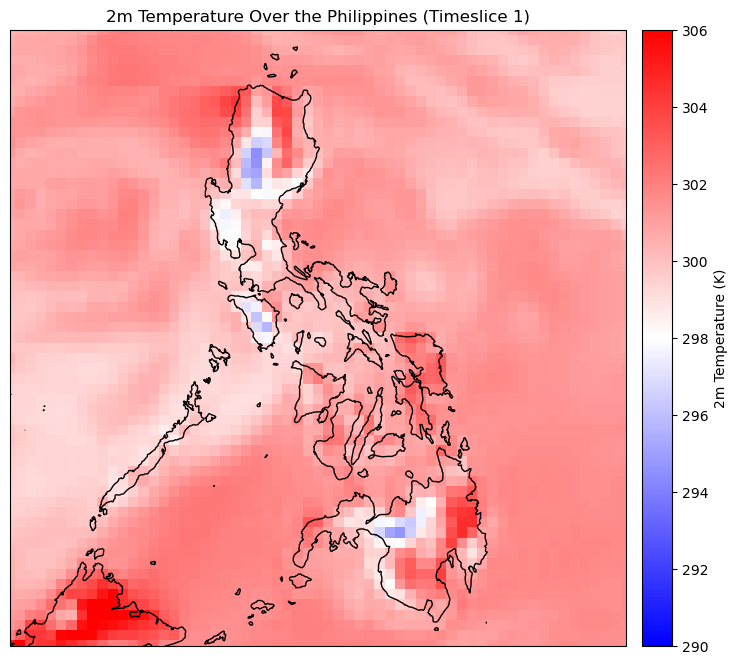

<xarray.DataArray 't2m' ()> Size: 4B
array(300.51822, dtype=float32)
Coordinates:
    number      int64 8B ...
    valid_time  datetime64[ns] 8B 2009-09-27T12:00:00
    expver      <U4 16B ...


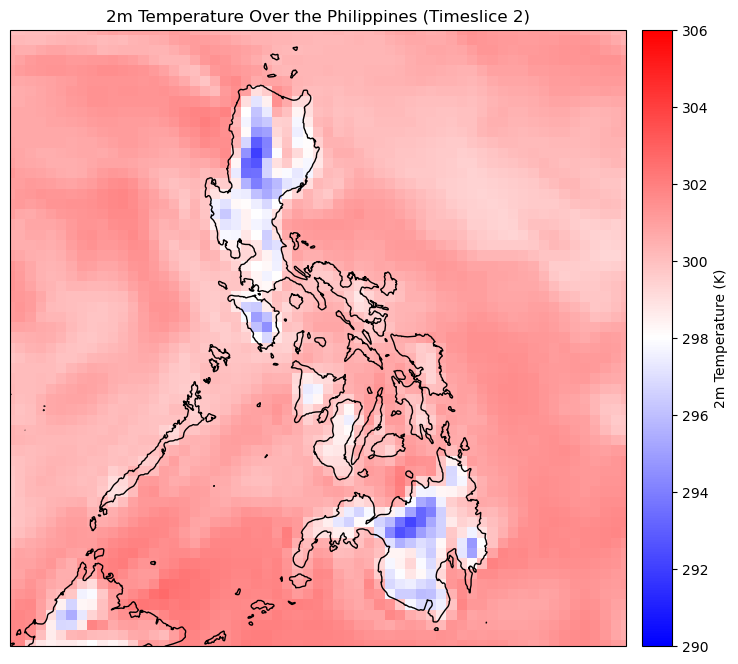

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select a single time slice (e.g., the first available valid time)
t2m_slice = t2m.isel(valid_time=1)  # Selects the first time slice
t2m_t1_mean = t2m_slice.mean()
print(t2m_t1_mean)

# Set up the figure and map projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([115, 130, 20, 5], crs=ccrs.PlateCarree()) 
# Add coastlines and gridlines
ax.coastlines(resolution="10m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data
temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice, 
                                 cmap='bwr', shading='auto', transform=ccrs.PlateCarree(),
                                 vmin=290, vmax=306)
plt.colorbar(temperature_plot, orientation='vertical', pad=0.02, label='2m Temperature (K)')
plt.title("2m Temperature Over the Philippines (Timeslice 1)")

plt.show()


# Select a single time slice (e.g., the first available valid time)
t2m_slice = t2m.isel(valid_time=2)  # Selects the first time slice
t2m_t1_mean = t2m_slice.mean()
print(t2m_t1_mean)

# Set up the figure and map projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([115, 130, 20, 5], crs=ccrs.PlateCarree()) 
# Add coastlines and gridlines
ax.coastlines(resolution="10m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data
temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice, 
                                 cmap='bwr', shading='auto', transform=ccrs.PlateCarree(),
                                 vmin=290, vmax=306)
plt.colorbar(temperature_plot, orientation='vertical', pad=0.02, label='2m Temperature (K)')
plt.title("2m Temperature Over the Philippines (Timeslice 2)")

plt.show()


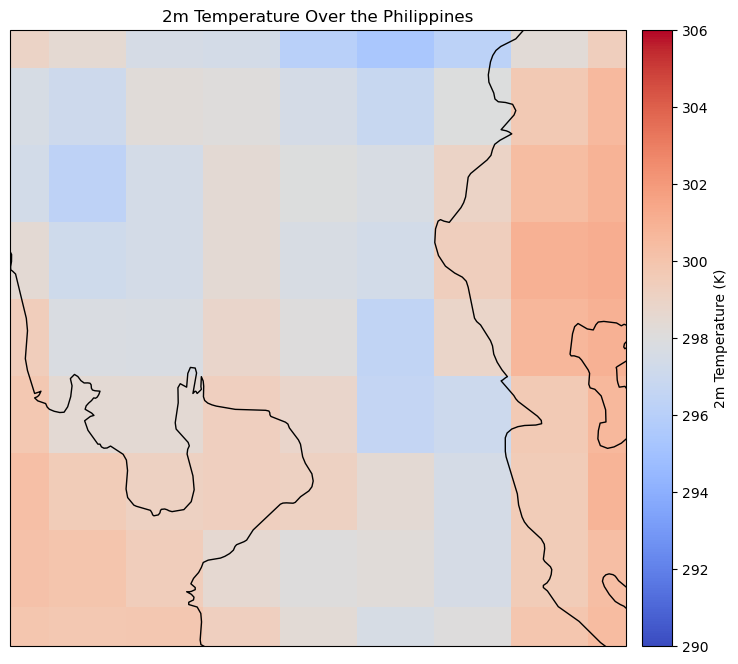

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select a single time slice (e.g., the first available valid time)
t2m_slice = t2m.isel(valid_time=2)  # Selects the first time slice

# Set up the figure and map projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([120, 122, 14, 16], crs=ccrs.PlateCarree()) 
# Add coastlines and gridlines
ax.coastlines(resolution="10m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data
temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice, 
                                 cmap='coolwarm', shading='auto', transform=ccrs.PlateCarree(),
                                 vmin=290, vmax=306)
plt.colorbar(temperature_plot, orientation='vertical', pad=0.02, label='2m Temperature (K)')
plt.title("2m Temperature Over the Philippines")

plt.show()


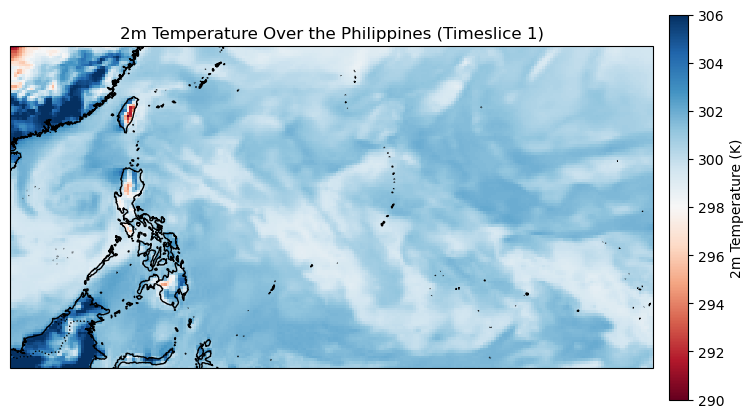

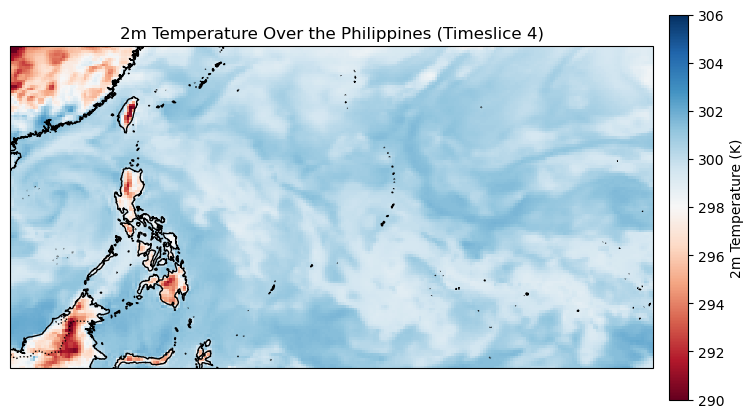

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select a single time slice (e.g., the first available valid time)
t2m_slice = t2m.isel(valid_time=1)  # Selects the first time slice

# Set up the figure and map projection
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([110, 170, 0, 30], crs=ccrs.PlateCarree()) 
# Add coastlines and gridlines
ax.coastlines(resolution="10m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data
temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice, 
                                 cmap='RdBu', shading='auto', transform=ccrs.PlateCarree(),
                                 vmin=290, vmax=306)
plt.colorbar(temperature_plot, orientation='vertical', pad=0.02, label='2m Temperature (K)')
plt.title("2m Temperature Over the Philippines (Timeslice 1)")

plt.show()


# Select a single time slice (e.g., the first available valid time)
t2m_slice = t2m.isel(valid_time=3)  # Selects the first time slice

# Set up the figure and map projection
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([110, 170, 0, 30], crs=ccrs.PlateCarree()) 
# Add coastlines and gridlines
ax.coastlines(resolution="10m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data
temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], t2m_slice, 
                                 cmap='RdBu', shading='auto', transform=ccrs.PlateCarree(),
                                 vmin=290, vmax=306)
plt.colorbar(temperature_plot, orientation='vertical', pad=0.02, label='2m Temperature (K)')
plt.title("2m Temperature Over the Philippines (Timeslice 4)")

plt.show()

#### Questions

1. What is the average temperature for this dataset?
2. Where are the highest and lowest temperatures located in this time slice?
3. How does the temperature distribution look over the region?
4. Duplicate the cell above, and then change `valid_time=2`. Compare and contrast the two plots. What is a possible reason for the temperature difference between timesteps?

#### Answers
1. The average tempertature for this timeslice seems to be at the 300.84 K.
2. The lowest temperatures are found mainly at 3 locations. The first is somewhere at Benguet, Ifugao, Mountain province. The 2nd is at the Oriental and Occidental Mindoro. The 3rd is around Lanao del Norte and del Sur. Opposite to this, the highest temperatures are found at Ilocos Norte, areas of Cagayan, Isabela, Agusan del Sur, Surigao del Sur, Davao Oriental and de Oro. 
3. Areas of Central Luzon, Northern Minadao, MIMAROPA, seem to have moderate temperatures. Northern Luzon, some portion of Metro Manila, CALABARZON, Bicol Region, Caraga, Davao Region, Zamboanga, and the entirety of Visayas show higher temperatures. Areas of Benguet, Ifugao, Mountain province. The 2nd is at the Oriental and Occidental Mindoro seem to be the coolest, while Ilocos Norte, areas of Cagayan, Isabela, Agusan del Sur, Surigao del Sur, Davao Oriental and de Oro are the hottest regions.
4. In the timeslice 2, it can be seen that there are more cool areas; most notably are portions of Central Luzon, with the areas previosly defined as the coolest seem to have intensified and expanded to the neighboring regions.

---

### Task 3: Open-Ended Exercise - Plotting `tp` (Total Precipitation)

Now that you’ve explored the `t2m` (2-meter temperature) variable, let’s try visualizing total precipitation (`tp`) over the Philippines. This exercise will test your ability to adapt code, interpret data, and customize plots as needed.

1. Adapt the Scripts Above: Modify the code from Task 2 to work with the `tp` variable instead of `t2m`. Make sure to:
   - Access the `tp` variable in the dataset.
    - Calculate descriptive statistics such as the mean, minimum, and maximum for `tp`.
    - Use two cells to plot two time slices of `tp` to show the spatial distribution of precipitation.
2. Customization
   - Adjust [color maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) as needed.
   - Update the title, color bar label, units
   - Don't forget to update vmin, vmax as needed
3. Hints:
   - Remember that `tp` represents total precipitation, so the units and values may differ significantly from temperature.
   - Use the [ERA5 data documentation](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation) if you need clarification on the meaning of this variable.
   - Use as many cells as you can.

Mean Total Precipitation: 0.43189969658851624
Min Total Precipitation: 0.0
Max Total Precipitation: 26.695728302001953


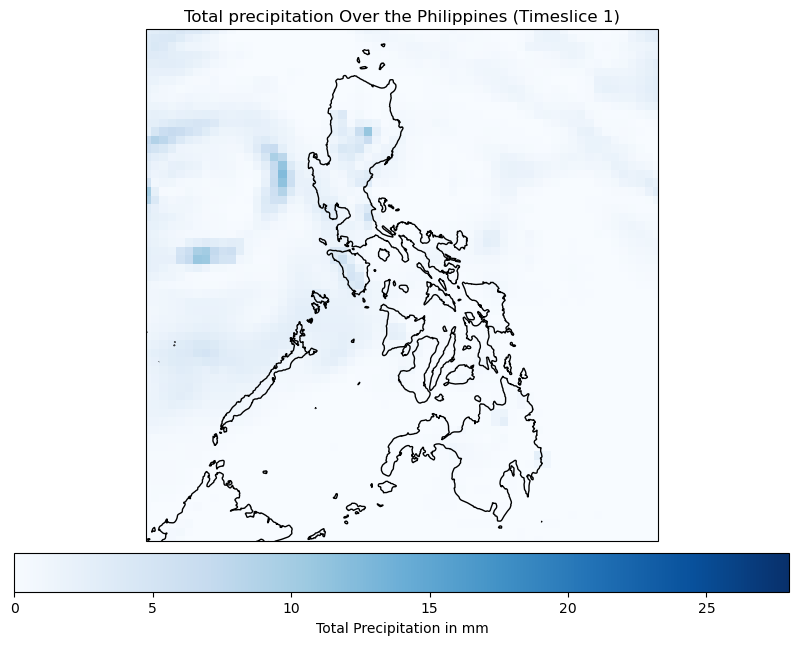

In [47]:
# Access the 't2m' variable
tp = data['tp'] * 1000

# Calculate descriptive statistics
mean_tp = tp.mean().values  # Overall mean temperature
min_tp = tp.min().values    # Minimum temperature
max_tp = tp.max().values    # Maximum temperature

print(f"Mean Total Precipitation: {mean_tp}")
print(f"Min Total Precipitation: {min_tp}")
print(f"Max Total Precipitation: {max_tp}")

# Select a single time slice (e.g., the first available valid time)
tp_slice = tp.isel(valid_time=1)  # Selects the first time slice

# Set up the figure and map projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([115, 130, 20, 5], crs=ccrs.PlateCarree()) 
# Add coastlines and gridlines
ax.coastlines(resolution="10m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data
temperature_plot = ax.pcolormesh(data['longitude'], data['latitude'], tp_slice, 
                                 cmap='Blues', shading='auto', transform=ccrs.PlateCarree(),
                                 vmin=0, vmax=28)
plt.colorbar(temperature_plot, orientation='horizontal', pad=0.02, label='Total Precipitation in mm')
plt.title("Total precipitation Over the Philippines (Timeslice 1)")

plt.show()


#### Questions:
1. What are the mean, minimum, and maximum values for precipitation (`tp`)?
2. How does precipitation vary across the Philippines in this time slice?
3. How does the distribution of `tp` differ from `t2m`?

## Answer:
1. The mean, minimum, and maximum values are as follows: 0.43mm for mean, 0mm for minimum, and 26.69mm for maximum total precipitation.
2. Most areas have no raifall present, with some having low values at different parts of the Philippines. Luzon has the most precipitation seen, mostly prominent in the Kalinga region.
3. tp values are different from t2m as the t2m has values in all grids as temperature variation is present and easier to see. tp on the other hand, will depend on the rainfall amount and when and where such events happen. That is why there is a large variation of visuals in the two plots.